In [ ]:
# from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# 1. For each feature and the target variables, obtain the mean, standard deviation, min,
# max, and 25/50/75% percentiles. (Show a table.)
WINE_CSV = ('/content/winequality-white.csv')
wdf = pd.read_csv(WINE_CSV , delimiter=';')
wdf.describe().T # table with flipped rows and columns for an easier read

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


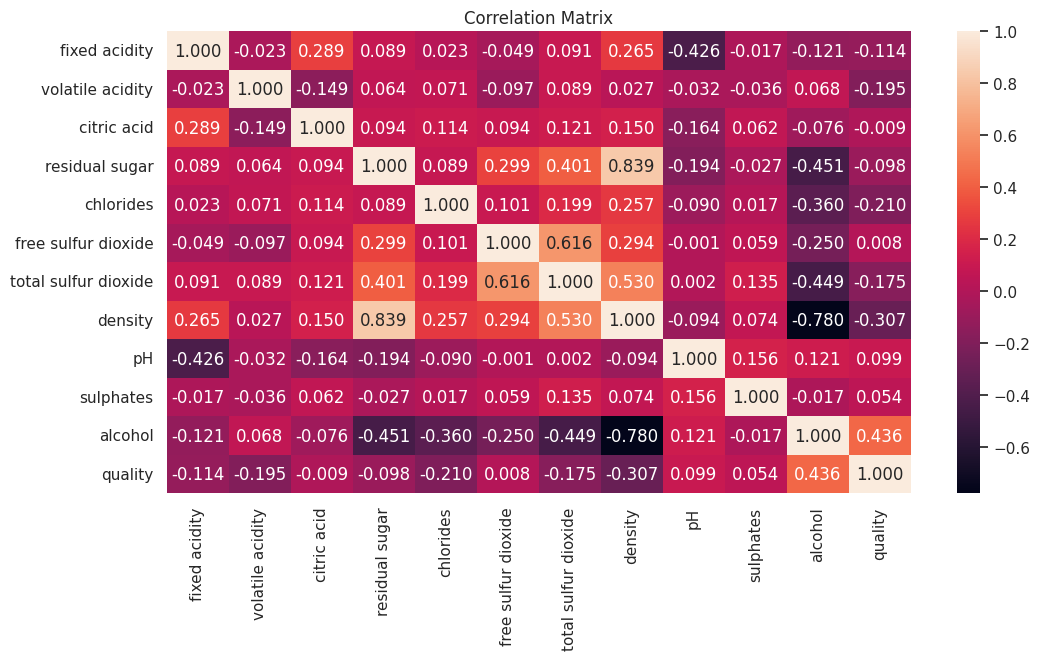

In [201]:
# 2. Illustrate the correlation matrix of all features and the target.
plt.figure(figsize=(12, 6)) # adjusted figure size
sns.heatmap(wdf.corr(), fmt=".3f", annot=True) # illustration of CM using seaborn; formatted to 3 decimal places
plt.title('Correlation Matrix') # title
plt.show()

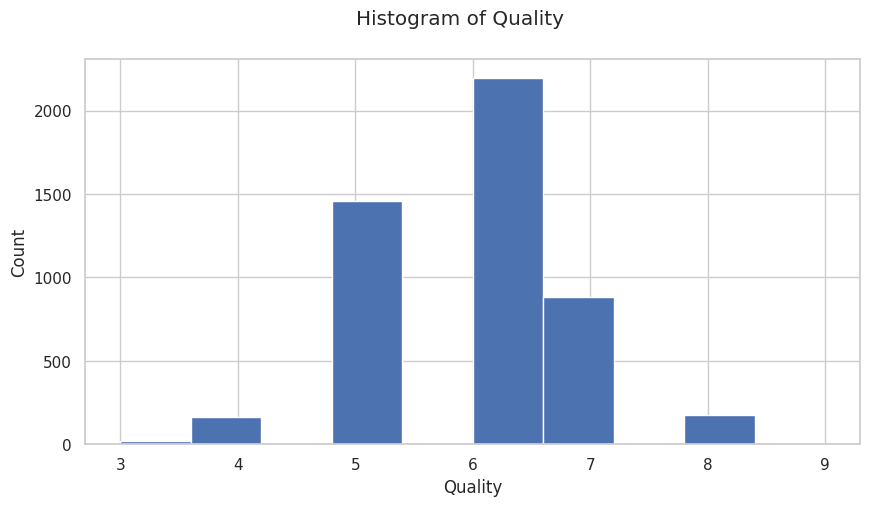

In [ ]:
# 3. Plot a histogram of the target value (quality).
plt.figure(figsize=(10, 5)) # adjusted figure size
ax = wdf['quality'].plot.hist() # histogram of quality
# meaningful labels and title
plt.suptitle('Histogram of Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
plt.show()

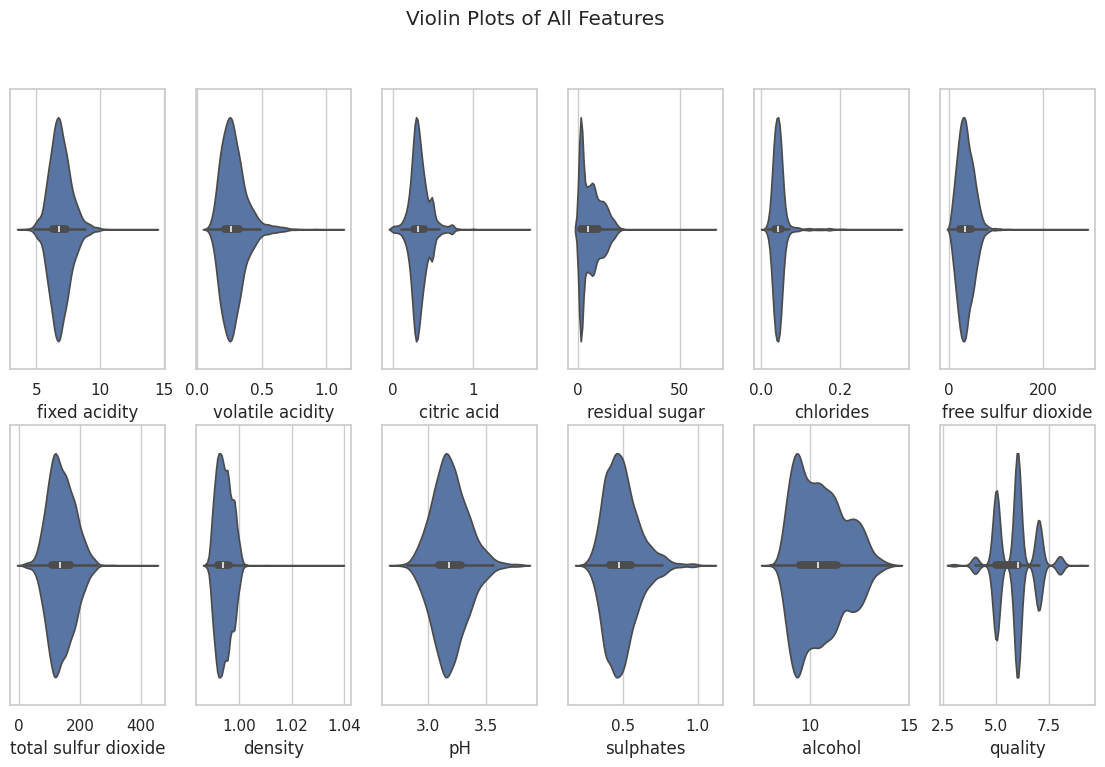

In [ ]:
# 4. Illustrate the violin plots of all features. Make sure that each plot is visible.
plt.figure(figsize=(14, 8))# figure size
for i, feature in enumerate(wdf.columns,1):# enumerate staring from column index 1
    plt.subplot(2, 6, i)# 2x6 grid (12 features); i = current feature
    sns.violinplot(x=feature, data = wdf) # violin plot for each feature w/ seaborn
plt.suptitle('Violin Plots of All Features')
plt.show()

linear regression model w/ single variable (alcohol)
Intercept = [2.5820094] 						 Coefficient = [0.3134693]
RMSE = 0.7971284628753889 					 R^2 = 0.1897253327492563


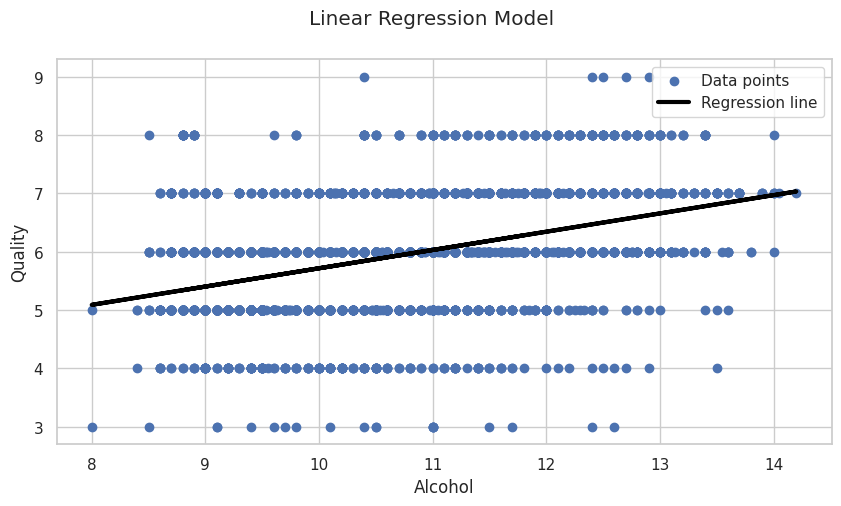

In [ ]:
# 5. Train a linear regression model with a single input variable (alcohol). Plot all data points
# (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

model = LinearRegression()
x = wdf[['alcohol']]
y = wdf[['quality']]
model.fit(x, y)
fitted = model.predict(x)
RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'linear regression model w/ single variable (alcohol)')
print(f'Intercept = {model.intercept_} \t\t\t\t\t\t Coefficient = {model.coef_[0]}')
print(f'RMSE = {RMSE} \t\t\t\t\t R^2 = {r2}')


# scatter plot & regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data points')
plt.plot(x, fitted, color='black', linewidth=3, label='Regression line')
# meaningful labels and title
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.suptitle('Linear Regression Model')
plt.legend()
plt.show()

In [ ]:
# 6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density).
# Show the intercept, coefficient, RMSE, and R^2.
x = wdf[['volatile acidity', 'alcohol', 'density']]
model.fit(x, y)
fitted = model.predict(x)
RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'linear regression model w/ variables (volatile_acidity, alcohol, and density)')
print(f'Intercept = {model.intercept_} \t\t\t Coefficients = {model.coef_[0]}')
print(f'RMSE = {RMSE} \t\t\t R^2 = {r2}')

linear regression model w/ variables (volatile_acidity, alcohol, and density)
Intercept = [-36.49861131] 			 Coefficients = [-2.07211594  0.39889282 38.99188669]
RMSE = 0.76848726881725 			 R^2 = 0.24690635619896484
